# <p style="text-align: center;">EE 379K: Data Science Lab</p>
# <p style="text-align: center;">Lab 4 - 10/9/17</p>
## <p style="text-align: center;">Rachel Chen and Kevin Yee</p>
### <p style="text-align: center;"> rjc2737 and kjy252</p>

Book: http://www-bcf.usc.edu/~gareth/ISL/ISLR%20First%20Printing.pdf

Website: http://www-bcf.usc.edu/~gareth/ISL/

Fischer's Linear Discriminant http://research.cs.tamu.edu/prism/lectures/pr/pr_l10.pdf

## Problem 1

![](http://i.markdownnotes.com/image_6CFQDap.jpg)

## 1.1

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
%matplotlib inline

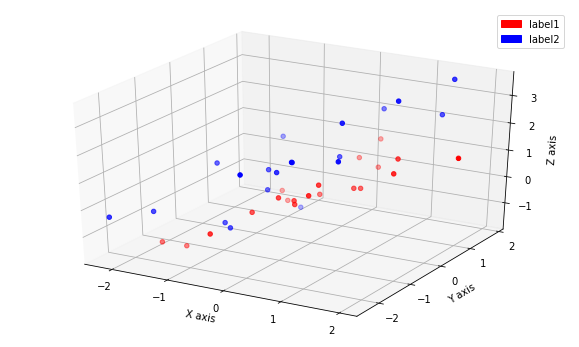

In [3]:
u1 = [0, 0, 0]
covMatrix1 = [[1, 0.9, 0.9], [0.9, 1, 0.9], [0.9, 0.9, 1]]

u2 = [0, 0, 1]
covMatrix2 = [[1, 0.8, 0.8], [0.8, 1, 0.8], [0.8, 0.8, 1]]

#generate 20 random points from a Gaussian multivariate distribution
x1, y1, z1 = np.random.multivariate_normal(u1, covMatrix1, 20).T
x2, y2, z2 = np.random.multivariate_normal(u2, covMatrix2, 20).T

C1 = np.column_stack((x1,y1,z1))
C2 = np.column_stack((x2,y2,z2))

#Stacked matrix 


#plot the 3D plot of the clouds of data points

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, y1, z1, c='r', marker='o')
ax.scatter(x2, y2, z2, c='b', marker='o')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

red_patch = mpatches.Patch(color='red', label='label1')
blue_patch = mpatches.Patch(color='blue', label='label2')
plt.legend(handles=[red_patch, blue_patch])

plt.show()

### Step 1:

Find Between Scatter plot Matrix 
$$\delta_b = ( \mu_1 - \mu_0)(\mu_1 - \mu_0)^T$$

Find In Class Scatter Matrix $\delta_w$

Where:
$$\delta_w = \sum_{X_i \subset C0} (X_i - \mu_0)(X_i- \mu_0)^T + \sum_{X_i \subset C1} (X_i - \mu_1)(X_i- \mu_1)^T$$

In [17]:
from collections import OrderedDict

scatter1 = 0
scatter2 = 0

u1 = np.asarray(u1)
u2 = np.asarray(u2)

# Calcalate Between Scatter Plot Matrx
Sb = np.dot((u1-u2).reshape(3,1),(np.transpose((u1-u2).reshape(3,1))))

#Caculate Class Scatter Matrix
for i in range(20):
    scatter1 += np.dot((C1[i] - u1).reshape(3,1),np.transpose((C1[i] - u1).reshape(3,1))) 
    scatter2 += np.dot((C2[i]- u2).reshape(3,1),np.transpose((C2[i] - u2).reshape(3,1)))
Sw = scatter1 + scatter2


#Calculate Fischers's Coefficients
eig_vals, eig_vecs  = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(3,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))

#create dict
#dictEig ={}
#ct = 0
#for val in eigVals:
    #dictEig[val] = eigVects[ct]
    #ct += 1
#sort dictionary
#sortedDict = OrderedDict(sorted(dictEig.items(), key = lambda t: t[0], reverse = True))


# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])
    
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))
    
W = eig_pairs[0][1].reshape(3,1)
print W


C1_lda = C1.dot(W)
C2_lda = C2.dot(W)


Eigenvector 1: 
[[ 1.]
 [ 0.]
 [ 0.]]
Eigenvalue 1: 0.00e+00

Eigenvector 2: 
[[ 0.]
 [ 1.]
 [ 0.]]
Eigenvalue 2: 0.00e+00

Eigenvector 3: 
[[-0.28031733]
 [-0.48245463]
 [ 0.82985525]]
Eigenvalue 3: 8.36e-02
Eigenvalues in decreasing order:

0.083612807948
0.0
0.0
Variance explained:

eigenvalue 1: 100.00%
eigenvalue 2: 0.00%
eigenvalue 3: 0.00%
[[-0.28031733]
 [-0.48245463]
 [ 0.82985525]]


##Problem 2. 
Problem 10 from Chapter 4 (Classification for the ‘weekly’ dataset) Read the chapter
to figure out how to use KNN and QDA, as we did not discuss these in class.

![](http://i.markdownnotes.com/image_tvUnpbf.jpg)

In [244]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier as KNN

import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option('display.notebook_repr_html', False)

%matplotlib inline
plt.style.use('seaborn-white')
from sklearn.linear_model import LogisticRegression
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.notebook_repr_html', False)

%matplotlib inline
plt.style.use('seaborn-white')

   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up


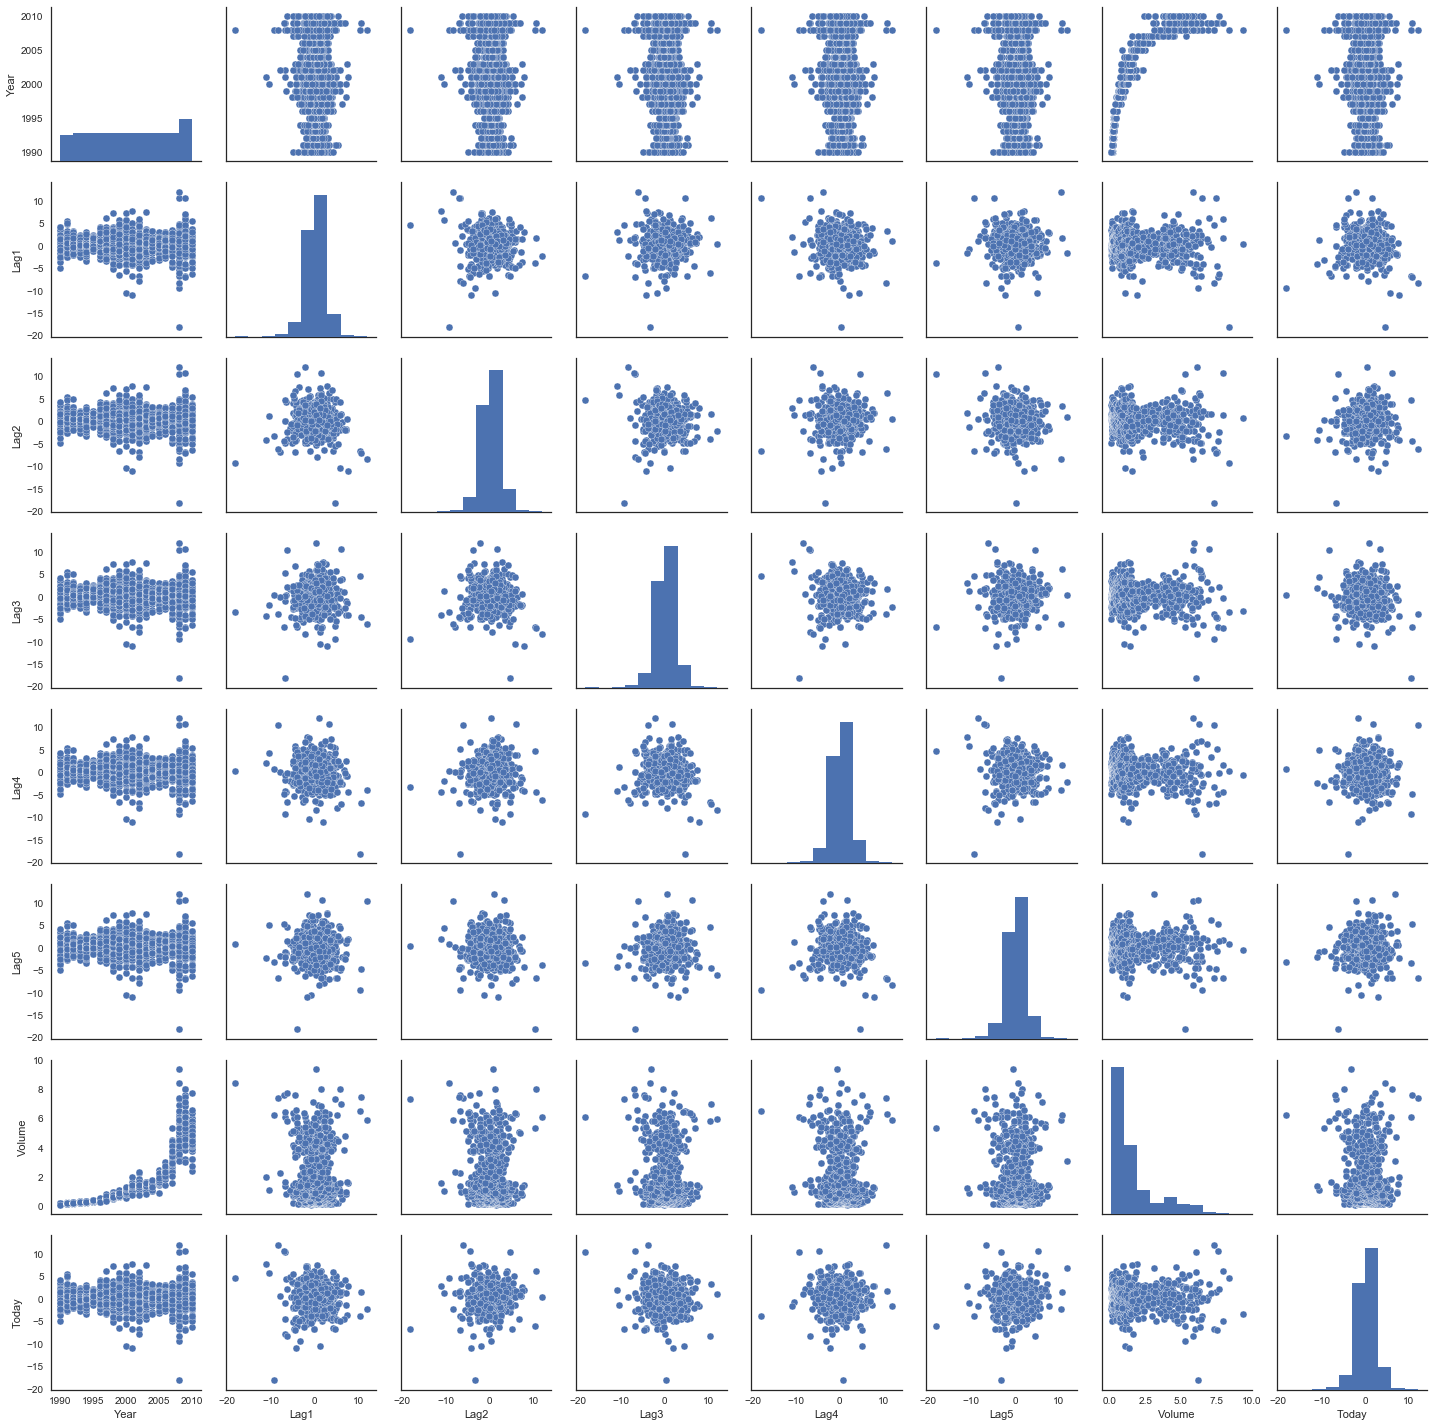

In [195]:
df = pd.read_csv('Data/Weekly.csv')
print df.head()
sns.pairplot(df);
sns.plt.show();

### Observation of Trends

1. Volume has a positivee correlation with year.

### 2(b)
Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [9]:
df.head()

   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up

In [183]:
X = df.loc[:,'Year':'Today']
y = df.Direction
y = y.replace("Down",1)
y = y.replace("Up",0)

In [184]:
logistic_model = (smf.glm(formula='Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume',
                                       data=df,
                                       family=sm.families.Binomial())
                               .fit())
logistic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1089
Model:                                              GLM   Df Residuals:                     1082
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                             1.0
Method:                                            IRLS   Log-Likelihood:                -743.18
Date:                                  Wed, 04 Oct 2017   Deviance:                       1486.4
Time:                                          08:45:01   Pearson chi2:                 1.09e+03
No. Iterations:                                       4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2669      0.086     -3.106      0.002      -0.435      -0.098
Lag1           0.0413      0.026      1.563      0.118      -0.010       0.093
Lag2          -0.0584      0.027     -2.175      0.030      -0.111      -0.006
Lag3           0.0161      0.027      0.602      0.547      -0.036       0.068
Lag4           0.0278      0.026      1.050      0.294      -0.024       0.080
Lag5           0.0145      0.026      0.549      0.583      -0.037       0.066
Volume         0.0227      0.037      0.616      0.538      -0.050       0.095
==============================================================================
"""

## 2(c)
Compute the confusion matrix and overall fraction of correct predictions. Regard value “Down” as the positive class. Calculate the sensitivity and specificity according to the confusion matrix.

https://en.wikipedia.org/wiki/Confusion_matrix

In [185]:
pred = logistic_model.predict(X)
print "Confusion Matrix: "
print confusion_matrix(y,pred.round()).T

Confusion Matrix: 
[[557 430]
 [ 48  54]]


In [186]:
#     Up    Down
#Up   557    430

#Down  48    54

In [192]:
pd.crosstab(y,pred.round(), rownames=['True'], colnames=['Predicted'], margins=True)

Predicted  0.0  1.0   All
True                     
0          557   48   605
1          430   54   484
All        987  102  1089

In [194]:
print "Classification Report"
print(classification_report(y,pred.round()))

Classification Report
             precision    recall  f1-score   support

          0       0.56      0.92      0.70       605
          1       0.53      0.11      0.18       484

avg / total       0.55      0.56      0.47      1089



## 2(d) 
Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [231]:
X1990 = df[df['Year']<=2008].replace("Down",1).replace("Up",0)
X2009 = df[df['Year']>2008].replace("Down",1).replace("Up",0)

print X1990.shape[0]
print X2009.shape[0]

X_train = X1990.Lag2
y_train = X1990.Direction

X_test = X2009.Lag2
y_test = X2009.Direction

log_reg = LogisticRegression()
log_reg.fit(X_train.reshape(-1,1),y_train)
pred = log_reg.predict(X_test.reshape(-1,1))

print pd.crosstab(y_test,pred.round(), rownames=['True'], colnames=['Predicted'], margins=True)
print(classification_report(y_test,pred.round()))

985
104
Predicted   0   1  All
True                  
0          56   5   61
1          34   9   43
All        90  14  104
             precision    recall  f1-score   support

          0       0.62      0.92      0.74        61
          1       0.64      0.21      0.32        43

avg / total       0.63      0.62      0.57       104



## 2(e) Repeat (d) using LDA.

Linear Discriminant Analysis (LDA) is actually a classification algorithm, but during training it learns the most discriminative axes between the classes, and these axes can then be used to define a hyperplane onto which to project the data. The benefit is that the projection will keep classes as far apart as possible, so LDA is a good technique to reduce dimensionality before running another classification algorithm such as an SVM classifier.



In [240]:
lda = LDA()
lda.fit(X_train.reshape(-1,1),y_train)
lda_pred = lda.predict(X_test.reshape(-1,1))
print pd.crosstab(y_test,lda_pred.round(), rownames=['True'], colnames=['Predicted'], margins=True)
print(classification_report(y_test,lda_pred.round()))

Predicted   0   1  All
True                  
0          56   5   61
1          34   9   43
All        90  14  104
             precision    recall  f1-score   support

          0       0.62      0.92      0.74        61
          1       0.64      0.21      0.32        43

avg / total       0.63      0.62      0.57       104



## 2(f) Repeat (d) using QDA.

In [246]:
qda = QDA()
qda.fit(X_train.reshape(-1,1),y_train)
qda_pred = qda.predict(X_test.reshape(-1,1))
print pd.crosstab(y_test,qda_pred.round(), rownames=['True'], colnames=['Predicted'], margins=True)
print(classification_report(y_test,qda_pred))

Predicted    0  All
True               
0           61   61
1           43   43
All        104  104
             precision    recall  f1-score   support

          0       0.59      1.00      0.74        61
          1       0.00      0.00      0.00        43

avg / total       0.34      0.59      0.43       104



## 2(g) Repeat (d) using KNN

In [245]:
knn1 = KNN(n_neighbors=1)
knn1.fit(X_train.reshape(-1,1),y_train)
knn_pred = knn1.predict(X_test.reshape(-1,1))
print pd.crosstab(y_test,knn_pred.round(), rownames=['True'], colnames=['Predicted'], margins=True)
print(classification_report(y_test,knn_pred.round()))

Predicted   0   1  All
True                  
0          30  31   61
1          22  21   43
All        52  52  104
             precision    recall  f1-score   support

          0       0.58      0.49      0.53        61
          1       0.40      0.49      0.44        43

avg / total       0.51      0.49      0.49       104



## Problem 3.
Problem 5 from Chapter 5 Estimating the test error of logistic regression using a
validation set.

![](http://i.markdownnotes.com/image_tE482Hl.png)
![](http://i.markdownnotes.com/image_vrk7zl2.png)

## Problem 4: 
Problem 8 from Chapter 5.(Cross Validation). Use Google or any other means to find
the Python counterpart to R’s rnorm.)

![](http://i.markdownnotes.com/image_OhVmZdh.png)
![](http://i.markdownnotes.com/image_4g7pr54.png)